# Análise e Modelagem Linear de Dados de Sangue

Este notebook demonstra como criar um modelo linear simples para prever valores de hemoglobina a partir de dados espectrais.# Exploração inicial dos dados

In [1]:
# Instalação das bibliotecas necessárias
!pip install gdown -q

## 1. Download dos Dados

Baixamos os dados do Google Drive para uso local.

In [2]:
import gdown

url = "https://drive.google.com/drive/folders/1fj_Rd3Pu_kVkRppchOl0G0AH1z_0IDvr?usp=sharing"
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/dados_sangue/IDRCShootOut2010Completo.mat',
 '/content/dados_sangue/TestSetReferenceValues.xlsx']

## 2. Carregamento e Exploração dos Dados

Carregamos os dados de espectros e valores de referência.

In [3]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = loadmat("dados_sangue/IDRCShootOut2010Completo.mat")

In [4]:
print("Chaves disponíveis no arquivo de dados:")
data.keys()

Chaves disponíveis no arquivo de dados:


dict_keys(['__header__', '__version__', '__globals__', 'WLaxis', 'XcalReflect', 'XcalTrans', 'XstdReflect', 'XstdTrans', 'XtestReflect', 'XtestTrans', 'XvalReflect', 'XvalTrans', 'YcalReflect', 'YcalTrans', 'YstdReflect', 'YstdTrans', 'YtestReflect', 'YtestTrans', 'YvalReflect', 'YvalTrans', 'labels'])

## 3. Preparação dos Dados para Modelagem

Selecionamos os dados de espectros de reflectância e os valores alvo (hemoglobina).

In [5]:
X_train = data["XcalReflect"]  # Espectros de calibração em reflectância
Y_train = data["YcalReflect"]  # Valores de referência

# Escolhemos apenas a Hemoglobina (primeira coluna dos valores de referência)
y_train = Y_train[:, 0]

# Dados para teste do modelo
X_test = data["XtestReflect"]
Y_test = data["YtestReflect"]
y_test = Y_test[:, 0]

print(f"Formato dos dados de treinamento (X): {X_train.shape}")
print(f"Formato dos dados de teste (X): {X_test.shape}")
print(f"Quantidade de amostras de treinamento: {len(y_train)}")
print(f"Quantidade de amostras de teste: {len(y_test)}")

Formato dos dados de treinamento (X): (173, 700)
Formato dos dados de teste (X): (194, 700)
Quantidade de amostras de treinamento: 173
Quantidade de amostras de teste: 194


## 4. Criação do Modelo Linear

Implementamos um modelo de regressão linear simples para prever os valores de hemoglobina.

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 5. Avaliação do Modelo

Analisamos o desempenho do modelo usando diferentes métricas.

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)        # Coeficiente de determinação
mse = mean_squared_error(y_test, y_pred)  # Erro quadrático médio
rmse = np.sqrt(mse)                  # Raiz do erro quadrático médio
mae = mean_absolute_error(y_test, y_pred) # Erro absoluto médio
bias = np.mean(y_pred - y_test)      # Viés (bias)

print("Métricas de avaliação do modelo:")
print(f"R² = {r2:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAE = {mae:.4f}")
print(f"Bias = {bias:.4f}")

Métricas de avaliação do modelo:
R² = 0.9280
RMSE = 0.7588
MAE = 0.5776
Bias = 0.4299


## 6. Visualização dos Resultados

Visualizamos graficamente a comparação entre valores previstos e reais.

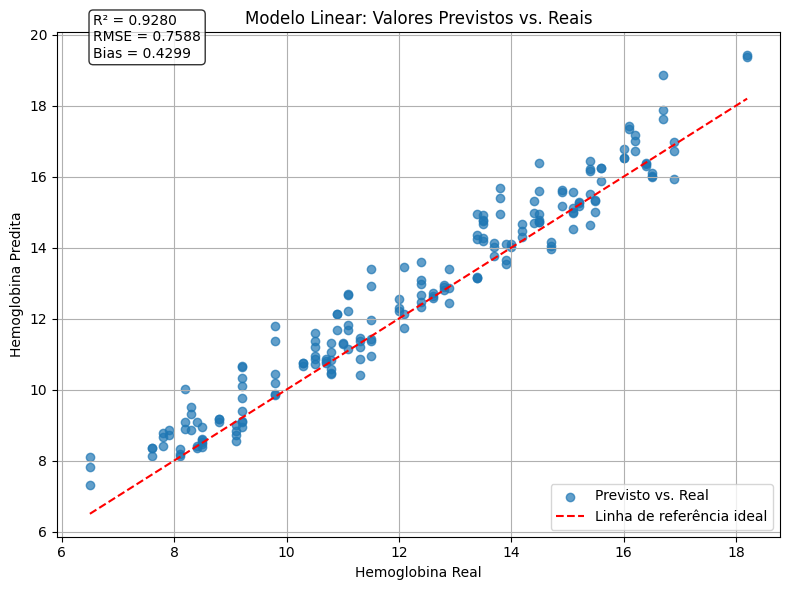

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Previsto vs. Real")
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Linha de referência ideal"
)
plt.xlabel("Hemoglobina Real")
plt.ylabel("Hemoglobina Predita")
plt.title("Modelo Linear: Valores Previstos vs. Reais")
plt.legend()
plt.grid(True)

plt.annotate(f"R² = {r2:.4f}\nRMSE = {rmse:.4f}\nBias = {bias:.4f}",
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
plt.tight_layout()
plt.show()